In [1]:
# imports
import cmb_ilc
from cmb_ilc import *

##################################################################################
# make plots prettier
import matplotlib
from matplotlib.pyplot import rc
import matplotlib.font_manager

rc('font',**{'size':'22','family':'serif','serif':['CMU serif']})
rc('mathtext', **{'fontset':'cm'})
rc('text', usetex=True)
rc('legend',**{'fontsize':'18'})

matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['xtick.labelsize'] = 25 
matplotlib.rcParams['ytick.labelsize'] = 25
matplotlib.rcParams['legend.fontsize'] = 25
#matplotlib.rcParams['legend.title_fontsize'] = 25
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.minor.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 1.5
matplotlib.rcParams['ytick.minor.width'] = 1.5
matplotlib.rcParams['axes.titlesize'] = 30
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
# Specifications (for an SO-like survey)
nBands = 6
Nu = np.array([27.e9,39.e9,93.e9,145.e9,225.e9,280.e9]) # [Hz]
Beam = np.array([7.4,5.1,2.2,1.4,1.0,0.9]) 
Noise = np.array([52.,27.,5.8,6.3,15.,37.]) # [muK*arcmin]

# create ILC object
cmbIlc = CMBILC(Nu, Beam, Noise, atm=True)

/home/noah/Berkeley/LensQuEst-1/basic_functions.py:98: RuntimeWarning: divide by zero encountered in true_divide
  try: return x/y
/home/noah/Berkeley/LensQuEst-1/cmb.py:127: RuntimeWarning: invalid value encountered in multiply
  data[:,1] *= self.fdl_to_cl(data[:,0]) # convert Dl to Cl
/home/noah/Berkeley/LensQuEst-1/cmb.py:135: RuntimeWarning: invalid value encountered in multiply
  data[:,1] *= self.fdl_to_cl(data[:,0]) # convert Dl to Cl
/home/noah/Berkeley/LensQuEst-1/cmb.py:149: RuntimeWarning: invalid value encountered in multiply
  data[:,1] *= self.fdl_to_cl(data[:,0]) # convert Dl to Cl


In [3]:
# multipoles of interest
lMin = 10.
lMax = 3000.
NL = 501
L = np.logspace(np.log10(lMin/2.), np.log10(2.*lMax), NL, 10.)

# various ILC weights: minimum variance, joint deprojection, tSZ deproj, CIB deproj
weightsIlcCmb = np.array([cmbIlc.weightsIlcCmb(l) for l in L])
weightsIlcCmb_jointDeproj = np.array([cmbIlc.weightsDeprojTszCIB(l) for l in L])
weightsIlcCmb_tszdeproj = np.array([cmbIlc.weightsDeprojTsz(l) for l in L])
weightsIlcCmb_cibdeproj = np.array([cmbIlc.weightsDeprojCIB(l) for l in L])

In [4]:
def power_spec(obs,weights,lindex):
   result = 0.
   l = L[lindex]
   for i in range(nBands):
      for j in range(nBands):
         CMB = cmbIlc.cmb[i,j]
         quant = None
         if obs == 'total': quant = CMB.ftotalTT(l)
         if obs == 'tSZ': quant = CMB.ftSZ(l)
         if obs == 'CIB': quant = CMB.fCIB(l)
         result += quant*weights[lindex][i]*weights[lindex][j]
   return result

In [5]:
# total map power for different ILCS
fCtotal = np.array([power_spec('total',weightsIlcCmb,lindex) for lindex in range(NL)])
fCtotal_deproj = np.array([power_spec('total',weightsIlcCmb_jointDeproj,lindex) for lindex in range(NL)])
fCtotal_tszdeproj = np.array([power_spec('total',weightsIlcCmb_tszdeproj,lindex) for lindex in range(NL)])
fCtotal_cibdeproj = np.array([power_spec('total',weightsIlcCmb_cibdeproj,lindex) for lindex in range(NL)])

In [6]:
# tSZ power for different ILCS
fCTsz = np.array([power_spec('tSZ',weightsIlcCmb,lindex) for lindex in range(NL)])
fCTsz_deproj = np.array([power_spec('tSZ',weightsIlcCmb_jointDeproj,lindex) for lindex in range(NL)])
fCTsz_tszdeproj = np.array([power_spec('tSZ',weightsIlcCmb_tszdeproj,lindex) for lindex in range(NL)])
fCTsz_cibdeproj = np.array([power_spec('tSZ',weightsIlcCmb_cibdeproj,lindex) for lindex in range(NL)])
fCTsz148 = np.array([cmbIlc.cmb[3,3].ftSZ(l) for l in L])

In [7]:
# CIB power for different ILCS
fCCIB = np.array([power_spec('CIB',weightsIlcCmb,lindex) for lindex in range(NL)])
fCCIB_deproj = np.array([power_spec('CIB',weightsIlcCmb_jointDeproj,lindex) for lindex in range(NL)])
fCCIB_tszdeproj = np.array([power_spec('CIB',weightsIlcCmb_tszdeproj,lindex) for lindex in range(NL)])
fCCIB_cibdeproj = np.array([power_spec('CIB',weightsIlcCmb_cibdeproj,lindex) for lindex in range(NL)])
fCCIB148 = np.array([cmbIlc.cmb[3,3].fCIB(l) for l in L])

Text(0, 0.5, '$C_\\ell/C^\\text{150 GHz}_\\ell$')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


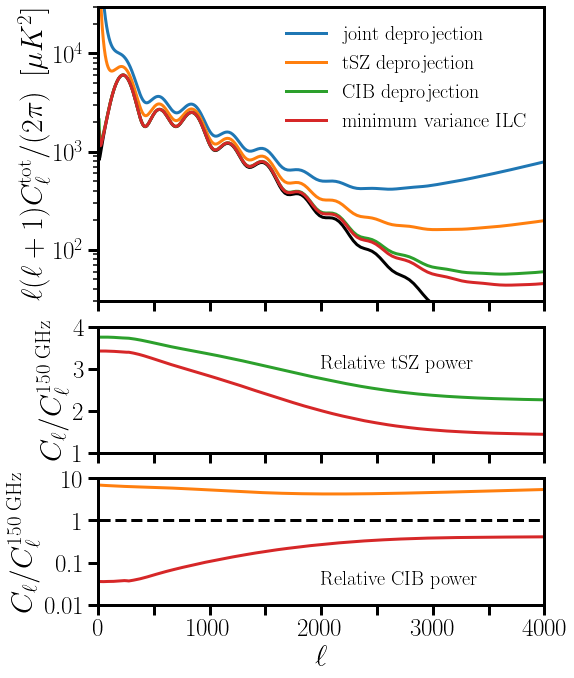

In [8]:
fig,ax = plt.subplots(3,1,figsize=(8,11),sharex=True,gridspec_kw={'height_ratios':[0.7,0.3,0.3],'hspace':0.14})

signal = np.array([cmbIlc.cmb[0,0].flensedTT(l) for l in L])

ax[0].semilogy(L,signal*L*(L+1)/(2.*np.pi),color='k',lw=3)

ax[0].semilogy(L,fCtotal_deproj*L*(L+1.)/(2.*np.pi),color='C0',label='joint deprojection',lw=3)
ax[0].semilogy(L,fCtotal_tszdeproj*L*(L+1.)/(2.*np.pi),color='C1',label='tSZ deprojection',lw=3)
ax[0].semilogy(L,fCtotal_cibdeproj*L*(L+1.)/(2.*np.pi),color='C2',label='CIB deprojection',lw=3)
ax[0].semilogy(L,fCtotal*L*(L+1.)/(2.*np.pi),color='C3',label='minimum variance ILC',lw=3)

ax[1].plot(L,fCTsz_cibdeproj/fCTsz148,color='C2',lw=3,label='CIB deprojection')
ax[1].plot(L,fCTsz/fCTsz148,color='C3',lw=3,label='minimum variance ILC')
ax[1].plot(L,np.ones(L.shape),c='k',lw=3,label='148 GHz',ls='--')

ax[2].semilogy(L,fCCIB_tszdeproj/fCCIB148,color='C1',label='tSZ deprojection',lw=3)
ax[2].semilogy(L,fCCIB/fCCIB148,color='C3',label='minimum variance ILC',lw=3)
ax[2].plot(L,np.ones(L.shape),c='k',lw=3,label='148 GHz',ls='--')


ax[0].set_xlim(0,4000)
ax[0].set_ylim(30,3e4)

ax[2].set_xlabel(r'$\ell$')
ax[0].set_ylabel(r'$\ell(\ell+1)C^\text{tot}_\ell/(2\pi)\,\,\,[\mu K^2]$')
ax[0].legend(loc=0,frameon=False,fontsize=20)

ax[1].set_yticks([1,2,3,4])
ax[1].set_ylim(1,4)

ax[2].set_yticks([10,1,0.1,0.01])
ax[2].set_yticklabels([10,1,0.1,0.01])
ax[2].set_ylim(0.01,10)

ax[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500,4000])
ax[2].set_xticklabels([0,'',1000,'',2000,'',3000,'',4000])

ax[1].text(2000,3,r'Relative tSZ power',fontsize=20)
ax[2].text(2000,3e-2,r'Relative CIB power',fontsize=20)

ax[1].set_ylabel(r'$C_\ell/C^\text{150 GHz}_\ell$')
ax[2].set_ylabel(r'$C_\ell/C^\text{150 GHz}_\ell$')